Dans cet article, nous utilisons Python et Pandas pour découvrir les 11 meilleures équipes qui ont le classement général moyen le plus élevé ainsi que les nationalités les plus courantes parmi les meilleures équipes.

On va répondre aux questions suivantes : 
1. Quels clubs ont le classement moyen le plus élevé?
2. Parmi ces clubs, quelles sont les nationalités les plus courantes ?

L'ensemble de données utilisé est l'ensemble de données Fifa 19 et les outils analytiques utilisés sont pandas, matplotlib et python.


In [ ]:
# Importer pandas pour l'analyse des données 
import pandas as pd

In [ ]:
# Importation dataset
fifa_df = pd.read_csv(r"G:\Big Data\Projets\Dataset\fifa_19_data.csv")

In [ ]:
# On va créer une copie de notre dataframe
fifa = fifa_df
fifa.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [ ]:
# 18207 lignes et 89 colonnes, type DataFrame
fifa.shape, type(fifa) 

((18207, 89), pandas.core.frame.DataFrame)

In [ ]:
# On va extraire les clubs avec le classement général moyen le plus élevé
equipes = fifa.groupby('Club')['Overall'].mean().sort_values(ascending=False).head(11)
equipes

Club
Juventus               82.280000
Napoli                 80.000000
Inter                  79.750000
Real Madrid            78.242424
Milan                  78.074074
FC Barcelona           78.030303
Paris Saint-Germain    77.433333
Roma                   77.423077
Manchester United      77.242424
FC Bayern München      77.000000
SL Benfica             77.000000
Name: Overall, dtype: float64

In [ ]:
equipes.shape, type(equipes)

((11,), pandas.core.series.Series)

In [ ]:
# On va créer une liste des noms de clubs à ajouter à notre graphique
clubs = ['Juventus', 'Napoli', 'Inter Milan', 'Real Madrid', 'AC Milan', 'Barcelona', 'PSG', 'Roma', 'Man. Utd.', 'Benfica', 'Bayern Munich']
clubs

['Juventus',
 'Napoli',
 'Inter Milan',
 'Real Madrid',
 'AC Milan',
 'Barcelona',
 'PSG',
 'Roma',
 'Man. Utd.',
 'Benfica',
 'Bayern Munich']

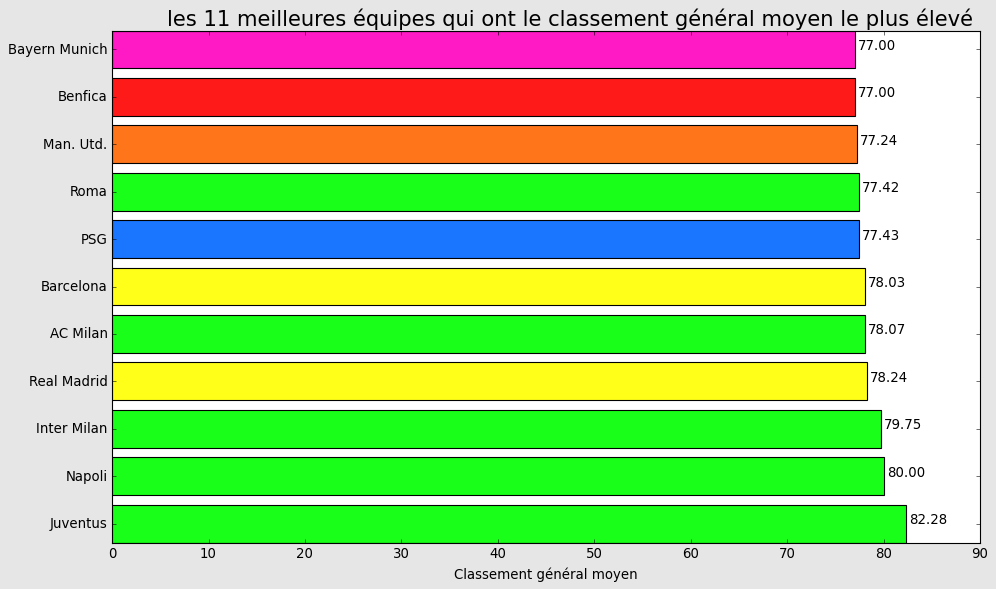

In [ ]:
# On importe les outil de visualisation de données et on va créer le graphique
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(14,8))
fig.patch.set_facecolor('#e6e6e6')
plt.style.use('classic')
for x,y in zip(equipes, clubs):

    label = "{:.2f}".format(x)

    plt.annotate(label, 
                 (x,y), 
                 textcoords="offset points", 
                 xytext=(20,0), 
                 ha='center') 
plt.barh(clubs, equipes, color=['#1aff1a', '#1aff1a', '#1aff1a', '#ffff1a', '#1aff1a', '#ffff1a', '#1a75ff', '#1aff1a', '#ff751a', '#ff1a1a', '#ff1ac6'], edgecolor='black')
plt.title('les 11 meilleures équipes qui ont le classement général moyen le plus élevé ', fontsize=19, loc='right')
plt.xlabel('Classement général moyen')

plt.show()

In [ ]:
equipes

Club
Juventus               82.280000
Napoli                 80.000000
Inter                  79.750000
Real Madrid            78.242424
Milan                  78.074074
FC Barcelona           78.030303
Paris Saint-Germain    77.433333
Roma                   77.423077
Manchester United      77.242424
FC Bayern München      77.000000
SL Benfica             77.000000
Name: Overall, dtype: float64

In [ ]:
# Extraire toutes les équipes d'en haut
fc = fifa['Club']

In [ ]:
countries = fifa.loc[(fc == 'SL Benfica') | (fc == 'Roma') | (fc == 'Manchester United') | (fc == 'FC Bayern München') | (fc == 'Paris Saint-Germain') | (fc == 'FC Barcelona') | (fc == 'Junventus') | (fc == 'Real Madrid') | (fc == 'Napoli') | (fc == 'Milan') |(fc == 'Inter')]
countries

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
6,6,177003,L. Modrić,32,https://cdn.sofifa.org/players/4/19/177003.png,Croatia,https://cdn.sofifa.org/flags/10.png,91,91,Real Madrid,...,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,€137.4M
7,7,176580,L. Suárez,31,https://cdn.sofifa.org/players/4/19/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,91,91,FC Barcelona,...,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,€164M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14244,14244,245100,M. Awoudja,20,https://cdn.sofifa.org/players/4/19/245100.png,Germany,https://cdn.sofifa.org/flags/21.png,61,72,FC Bayern München,...,51.0,53.0,61.0,63.0,8.0,7.0,9.0,5.0,8.0,€694K
14253,14253,246127,P. Will,19,https://cdn.sofifa.org/players/4/19/246127.png,Germany,https://cdn.sofifa.org/flags/21.png,61,77,FC Bayern München,...,52.0,60.0,63.0,65.0,10.0,10.0,11.0,10.0,7.0,€1.2M
14286,14286,246139,Iñaki Peña,19,https://cdn.sofifa.org/players/4/19/246139.png,Spain,https://cdn.sofifa.org/flags/45.png,61,78,FC Barcelona,...,38.0,9.0,10.0,11.0,63.0,57.0,64.0,57.0,62.0,€1.2M
15430,15430,243514,J. Meier,18,https://cdn.sofifa.org/players/4/19/243514.png,Germany,https://cdn.sofifa.org/flags/21.png,59,75,FC Bayern München,...,42.0,59.0,65.0,66.0,6.0,10.0,10.0,15.0,14.0,€660K


In [ ]:
# Le décompte des différentes nationalités des meilleurs clubs
top_nations = countries.groupby('Nationality')['Nationality'].value_counts().sort_values(ascending=False).head(13)
top_nations

Nationality  Nationality
Spain        Spain          52
Italy        Italy          37
France       France         31
Germany      Germany        23
Brazil       Brazil         22
Argentina    Argentina      18
Portugal     Portugal       13
England      England        11
Croatia      Croatia        10
Belgium      Belgium         8
Netherlands  Netherlands     6
Uruguay      Uruguay         5
Serbia       Serbia          5
Name: Nationality, dtype: int64

In [ ]:
labels = ['Spain', 'Italy', 'France', 'Germany', 'Brazil', 'Argentina', 'Portugal', 'England', 'Croatia', 'Belgium', 'Netherlands', 'Uruguay', 'Serbia']
labels

['Spain',
 'Italy',
 'France',
 'Germany',
 'Brazil',
 'Argentina',
 'Portugal',
 'England',
 'Croatia',
 'Belgium',
 'Netherlands',
 'Uruguay',
 'Serbia']

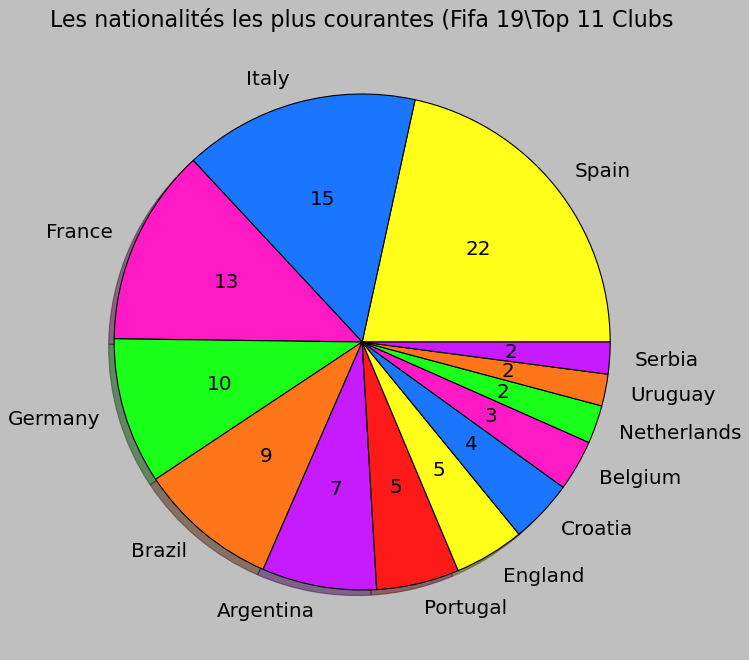

In [ ]:
plt.figure(figsize=(10,10))
plt.pie(top_nations, labels=labels, autopct=lambda p: '{:.0f}'.format(p), shadow=True, colors=['#ffff1a', '#1a75ff', '#ff1ac6', '#1aff1a', '#ff751a', '#c61aff', '#ff1a1a'], textprops={'fontsize': 18})
plt.title('Les nationalités les plus courantes (Fifa 19\Top 11 Clubs', fontsize=20)
plt.savefig('pie_plot_fifa')
plt.show()